# Apriori and FP Growth Algorithm analysis

## Baseline

Implement both apriori and fp growth algorithm, apply them on kaggle and IBM dataset to generate the association rules.

* kaggle dataset - Market Basket Optimization
* IBM dataset


In [1]:
# import packges
import numpy as np
import pandas as pd

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

from associator import Associator
from algorithm.apriori import Apriori
from algorithm.fpgrowth import FPGrowth
from dataset_helper.dataset_loader import DataLoader


Showing result for kaggle dataset on apriori algorithm

In [2]:
# ! python associator.py -a A -t kaggle -s 0.01 -c 0.01

data = pd.read_csv("results/kaggle_Apriori.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:50]

,Rule,Confidence
0,soup ==> mineral water,0.46
1,olive oil ==> mineral water,0.42
2,ground beef ==> mineral water,0.42
3,salmon ==> mineral water,0.40
4,cereals ==> mineral water,0.40
5,ground beef ==> spaghetti,0.40
6,cooking oil ==> mineral water,0.39
7,red wine ==> mineral water,0.39
8,chicken ==> mineral water,0.38
9,frozen vegetables ==> mineral water,0.37


Showing result for kaggle dataset on fp growth algorithm

In [11]:
# ! python associator.py -a F -t kaggle -s 0.01 -c 0.01

data = pd.read_csv("results/kaggle_FPGrowth.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:50]

,Rule,Confidence
0,salmon ==> mineral water,0.50
1,olive oil ==> mineral water,0.43
2,soup ==> mineral water,0.40
3,soup ==> milk,0.40
4,honey ==> mineral water,0.40
5,herb & pepper ==> spaghetti,0.40
6,herb & pepper ==> mineral water,0.40
7,herb & pepper ==> ground beef,0.40
8,ground beef ==> spaghetti,0.40
9,ground beef ==> mineral water,0.40


In [4]:
# ! python associator.py -a A -t ibm -s 0.01 -c 0.01

data = pd.read_csv("results/ibm_Apriori.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:50]

,Rule,Confidence
0,28 ==> 14,0.26
1,91 ==> 67,0.22
2,15 ==> 56,0.21
3,26 ==> 14,0.21
4,99 ==> 14,0.21
5,110 ==> 67,0.20
6,49 ==> 34,0.20
7,67 ==> 14,0.20
8,116 ==> 56,0.20
9,111 ==> 56,0.19


Showing result for ibm dataset on fp growth algorithm

In [13]:
# ! python associator.py -a F -t ibm -s 0.01 -c 0.01

data = pd.read_csv("results/ibm_FPGrowth.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:50]

,Rule,Confidence
0,28 ==> 14,0.33
1,91 ==> 67,0.29
2,116 ==> 56,0.25
3,116 ==> 14,0.25
4,72 ==> 18,0.22
5,110 ==> 67,0.22
6,110 ==> 14,0.22
7,1 ==> 56,0.22
8,111 ==> 56,0.21
9,6 ==> 67,0.20


## Weka results

Running weka tools by using `python-weka-wrapper`

Result for kaggle dataset on weka apriori
```
Apriori
=======

Minimum support: 0.01 (75 instances)
Minimum metric <confidence>: 0.01
Number of cycles performed: 20

Generated sets of large itemsets:

Size of set of large itemsets L(1): 75

Size of set of large itemsets L(2): 168

Size of set of large itemsets L(3): 17

Best rules found:

  1. eggs=1 ground beef=1 150 ==> mineral water=1 76    <conf:(0.51)> lift:(2.13) lev:(0.01) [40] conv:(1.52)
  2. ground beef=1 milk=1 165 ==> mineral water=1 83    <conf:(0.5)> lift:(2.11) lev:(0.01) [43] conv:(1.51)
  3. chocolate=1 ground beef=1 173 ==> mineral water=1 82    <conf:(0.47)> lift:(1.99) lev:(0.01) [40] conv:(1.43)
  4. frozen vegetables=1 milk=1 177 ==> mineral water=1 83    <conf:(0.47)> lift:(1.97) lev:(0.01) [40] conv:(1.42)
  5. soup=1 379 ==> mineral water=1 173    <conf:(0.46)> lift:(1.91) lev:(0.01) [82] conv:(1.39)
  6. pancakes=1 spaghetti=1 189 ==> mineral water=1 86    <conf:(0.46)> lift:(1.91) lev:(0.01) [40] conv:(1.38)
  7. olive oil=1 spaghetti=1 172 ==> mineral water=1 77    <conf:(0.45)> lift:(1.88) lev:(0) [36] conv:(1.36)
  8. milk=1 spaghetti=1 266 ==> mineral water=1 118    <conf:(0.44)> lift:(1.86) lev:(0.01) [54] conv:(1.36)
  9. chocolate=1 milk=1 241 ==> mineral water=1 105    <conf:(0.44)> lift:(1.83) lev:(0.01) [47] conv:(1.34)
 10. ground beef=1 spaghetti=1 294 ==> mineral water=1 128    <conf:(0.44)> lift:(1.83) lev:(0.01) [57] conv:(1.34)
 ...
```

Result for kaggle dataset on weka fp growth
```
FPGrowth found 432 rules (displaying top 100)

  1. [eggs=1, ground beef=1]: 150 ==> [mineral water=1]: 76   <conf:(0.51)> lift:(2.13) lev:(0.01) conv:(1.52)
  2. [milk=1, ground beef=1]: 165 ==> [mineral water=1]: 83   <conf:(0.5)> lift:(2.11) lev:(0.01) conv:(1.51)
  3. [chocolate=1, ground beef=1]: 173 ==> [mineral water=1]: 82   <conf:(0.47)> lift:(1.99) lev:(0.01) conv:(1.43)
  4. [milk=1, frozen vegetables=1]: 177 ==> [mineral water=1]: 83   <conf:(0.47)> lift:(1.97) lev:(0.01) conv:(1.42)
  5. [soup=1]: 379 ==> [mineral water=1]: 173   <conf:(0.46)> lift:(1.91) lev:(0.01) conv:(1.39)
  6. [spaghetti=1, pancakes=1]: 189 ==> [mineral water=1]: 86   <conf:(0.46)> lift:(1.91) lev:(0.01) conv:(1.38)
  7. [spaghetti=1, olive oil=1]: 172 ==> [mineral water=1]: 77   <conf:(0.45)> lift:(1.88) lev:(0) conv:(1.36)
  8. [spaghetti=1, milk=1]: 266 ==> [mineral water=1]: 118   <conf:(0.44)> lift:(1.86) lev:(0.01) conv:(1.36)
  9. [chocolate=1, milk=1]: 241 ==> [mineral water=1]: 105   <conf:(0.44)> lift:(1.83) lev:(0.01) conv:(1.34)
 10. [spaghetti=1, ground beef=1]: 294 ==> [mineral water=1]: 128   <conf:(0.44)> lift:(1.83) lev:(0.01) conv:(1.34)
 ...
```

Result for ibm dataset on weka  apriori
```
Apriori
=======

Minimum support: 0.01 (58 instances)
Minimum metric <confidence>: 0.01
Number of cycles performed: 20

Generated sets of large itemsets:

Size of set of large itemsets L(1): 89

Size of set of large itemsets L(2): 177

Best rules found:

  1. 28=1 352 ==> 14=1 91    <conf:(0.26)> lift:(1.56) lev:(0.01) [32] conv:(1.12)
  2. 91=1 433 ==> 67=1 96    <conf:(0.22)> lift:(1.42) lev:(0) [28] conv:(1.08)
  3. 15=1 306 ==> 56=1 65    <conf:(0.21)> lift:(1.34) lev:(0) [16] conv:(1.06)
  4. 26=1 380 ==> 14=1 79    <conf:(0.21)> lift:(1.25) lev:(0) [15] conv:(1.05)
  5. 99=1 407 ==> 14=1 84    <conf:(0.21)> lift:(1.24) lev:(0) [16] conv:(1.05)
  6. 110=1 527 ==> 67=1 107    <conf:(0.2)> lift:(1.3) lev:(0) [24] conv:(1.06)
  7. 49=1 420 ==> 34=1 85    <conf:(0.2)> lift:(1.39) lev:(0) [23] conv:(1.07)
  8. 67=1 902 ==> 14=1 179    <conf:(0.2)> lift:(1.2) lev:(0.01) [29] conv:(1.04)
  9. 116=1 486 ==> 56=1 95    <conf:(0.2)> lift:(1.24) lev:(0) [18] conv:(1.04)
 10. 111=1 801 ==> 56=1 156    <conf:(0.19)> lift:(1.23) lev:(0.01) [29] conv:(1.04)
 ...
```

Result for ibm dataset on weka  fp growth
```
FPGrowth found 354 rules (displaying top 100)

  1. [28=1]: 352 ==> [14=1]: 91   <conf:(0.26)> lift:(1.56) lev:(0.01) conv:(1.12)
  2. [91=1]: 433 ==> [67=1]: 96   <conf:(0.22)> lift:(1.42) lev:(0) conv:(1.08)
  3. [15=1]: 306 ==> [56=1]: 65   <conf:(0.21)> lift:(1.34) lev:(0) conv:(1.06)
  4. [26=1]: 380 ==> [14=1]: 79   <conf:(0.21)> lift:(1.25) lev:(0) conv:(1.05)
  5. [99=1]: 407 ==> [14=1]: 84   <conf:(0.21)> lift:(1.24) lev:(0) conv:(1.05)
  6. [110=1]: 527 ==> [67=1]: 107   <conf:(0.2)> lift:(1.3) lev:(0) conv:(1.06)
  7. [49=1]: 420 ==> [34=1]: 85   <conf:(0.2)> lift:(1.39) lev:(0) conv:(1.07)
  8. [67=1]: 902 ==> [14=1]: 179   <conf:(0.2)> lift:(1.2) lev:(0.01) conv:(1.04)
  9. [116=1]: 486 ==> [56=1]: 95   <conf:(0.2)> lift:(1.24) lev:(0) conv:(1.04)
 10. [111=1]: 801 ==> [56=1]: 156   <conf:(0.19)> lift:(1.23) lev:(0.01) conv:(1.04)
 ...
```

# Analysis

## FPGrowth

The FPGrowth algotithm is much faster than Apriori algorithm

In [5]:
def plot_fp_growth_analysis():
    associator = Associator()
    algorithm = FPGrowth()
    data = DataLoader.load_kaggle_data()
    ss = np.arange(0.001, 0.5, 0.005)
    cc = np.arange(0.001, 0.5, 0.005)
    ti = []
    for s in list(ss):
        tj = []
        for c in list(cc)[::-1]:
            print(s, c)
            _, z = associator.generate_rules(algorithm, data, s, c)
            print(s, c, z)        
            tj.append(z)
        ti.append(tj)
    z = np.array(ti)
    h = plt.contourf(ss, cc, z)
    plt.show()
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot contour curves
    cset = ax.contour(ss, cc, z, cmap=cm.coolwarm)
    plt.show()



From the code snippet aboce, we can generate relationship on how minimun support and minimun confidence affects the computation of the rules.

We demostrate two plots
1. 2D coutour view with minsup, minconf over time
2. 3D coutour view with minsup, minconf over time

In [ ]:
# plot_fp_growth_analysis()

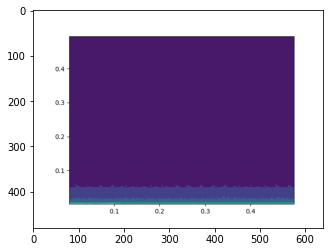

In [19]:
image = plt.imread("images/fp_growth_2d.png")
plt.imshow(image)

X-axis - support
Y-axis - confidence

The lower the support the longer the algorithm takes

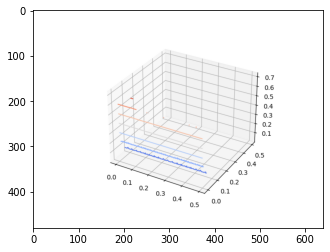

In [18]:
image = plt.imread("images/fp_growth_3d.png")
plt.imshow(image)

## Apriori

Apriori algotithm is slower

In [9]:
def plot_apriori_analysis():
    associator = Associator()
    algorithm = Apriori()
    data = DataLoader.load_kaggle_data()
    ss = np.arange(0.005, 0.1, 0.002)
    cc = np.arange(0.005, 0.1, 0.002)
    ti = []
    for s in list(ss):
        tj = []
        for c in list(cc)[::-1]:
            _, z = associator.generate_rules(algorithm, data, s, c)
            tj.append(z)
        ti.append(tj)
    z = np.array(ti)
    h = plt.contourf(ss, cc, z)
    plt.show()
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    cset = ax.contour(ss, cc, z, cmap=cm.coolwarm)
    plt.show()

From the code snippet aboce, we can generate relationship on how minimun support and minimun confidence affects the computation of the rules.

3D coutour view with minsup, minconf over time

In [10]:
# plot_apriori_analysis()

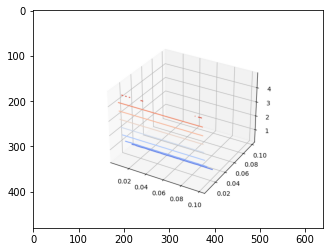

In [21]:
image = plt.imread("images/apriori_3d.png")
plt.imshow(image)

Apriori algorithm significantly takes more time than FP-growth when the settings are the same.

The lower the support the longer the algorithm takes to compute the rules.

## Answer to the question 

- Q: High support, high confidence ?
    - A: Less frequent itemset found in dataset, less rules generated from the association rules.
- Q: High support, low confidence ?
    - A: Less frequent itemset found in dataset, will have more generated rules than high support, high confidence.
- Low support, low confidence ?
    - A: More frequent itemset found in dataset, will have tones of generated rules.
- Low support, high confidence?
    - A: More frequent itemset found in dataset, will have less generated rules than low support, low confidence.


# Analysis


In [22]:
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 4 -nitems 0.12 -fname output11
# ./quest/gen lit -ascii -ntrans 10 -tlen 4 -nitems 0.12 -fname output12
# ./quest/gen lit -ascii -ntrans 15 -tlen 4 -nitems 0.12 -fname output13
# ./quest/gen lit -ascii -ntrans 30 -tlen 4 -nitems 0.12 -fname output14

# ./quest/gen lit -ascii -ntrans 7.5 -tlen 4 -nitems 0.12 -fname output21
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 5 -nitems 0.12 -fname output22
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 7 -nitems 0.12 -fname output23
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 14 -nitems 0.12 -fname output24

# ./quest/gen lit -ascii -ntrans 7.5 -tlen 4 -nitems 0.12 -fname output31
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 4 -nitems 0.2 -fname output32
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 4 -nitems 0.4 -fname output33
# ./quest/gen lit -ascii -ntrans 7.5 -tlen 4 -nitems 0.8 -fname output34

Code above generates 12 set of dataset, analysis by FP-growth
1. different number of transaction
2. different number of transaction length
3. different number of item space

## different number of transaction

| # transactions | avg tx length | item space | time taken |
| ----- | ---- | ---- | ---- |
| 7500 |  4  | 120 | 0.20705652236938477 |
| 10000 | 4 | 120 | 0.3617124557495117 |
| 15000 | 4 | 120 | 0.7351491451263428 |
| 30000 | 4 | 120 | 2.5330429077148438 |

## different number of transaction length

| # transactions | avg tx length | item space | time taken |
| ----- | ---- | ---- | ---- |
| 7500 |  4  | 120 | 0.3276193141937256 |
| 7500 | 5 | 120 | 0.5391771793365479 |
| 7500 | 7 | 120 | 1.7423465251922607 |
| 7500 | 14 | 120 | 16.514819860458374 |

## different number of item space

| # transactions | avg tx length | item space | time taken |
| ----- | ---- | ---- | ---- |
| 7500 |  4  | 120 | 0.22516798973083496 |
| 7500 | 4 | 200 | 0.1831350326538086 |
| 7500 | 4 | 400 | 0.135728120803833 |
| 7500 | 4 | 800 | 0.07982134819030762 |


### Observation
- more transaction takes more time
- more items in a itemset takes more time, can increase exponentially
- less item space takes more time, since items are not sparse